# Week 3 - Univariate Analysis

## Please run the cells of the notebook as you get to them while reading

In [49]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# 1. Lesson: Bar charts and univariate graphs

Let's make a dataset (in this case, just a series) which is weighted to have more small values than large values.  By squaring a random number between 0 and 1, we ensure that half (those whose initial value is below 0.5) are below 0.25, while the other half are between 0.25 and 1.  This means that most of the values are small, and it's more interesting than analyzing a perfectly uniform dataset.  This kind of trick - transforming one random variable to get another - can generate a variety of random datasets for you.  We then multiply by 100 to get a number between 0 and 100.

In [50]:
np.random.seed(0)
lesson_series = np.round(np.random.random(size = 1000)**2 * 100, 2)
lesson_series[0:10] # check the first ten values.  Are they mostly on the small side?

array([30.12, 51.15, 36.33, 29.69, 17.95, 41.72, 19.15, 79.53, 92.86,
       14.7 ])

In [51]:
import seaborn as sns

In the plot below, you can see a histogram of the values in the series.  For some reason, it decided to have exactly 11 bins (we allowed it to choose the number of bins.)  Most values - about 300 of them - are between 0 and 9, and the next most likely bin is between 9 and 18.  Since there are 1000 values, the total of the bars should be 1000.

<Axes: ylabel='Count'>

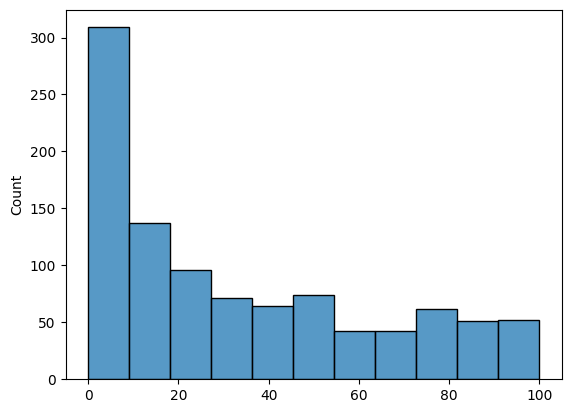

In [52]:
sns.histplot(lesson_series)

There are 11 bins or bars, a number which by default is chosen by seaborn.  We can reproduce this manually to (hopefully) see the same values as numbers. I'm not sure that this second histogram is guaranteed to be exactly the same, but it looks the same to me:

In [53]:
np.histogram(lesson_series, bins = 11)[0]

array([309, 137,  96,  71,  64,  74,  42,  42,  62,  51,  52])

What happens if we override seaborn and choose the number of bins ourselves?  We could choose a much larger number of bins:

<Axes: ylabel='Count'>

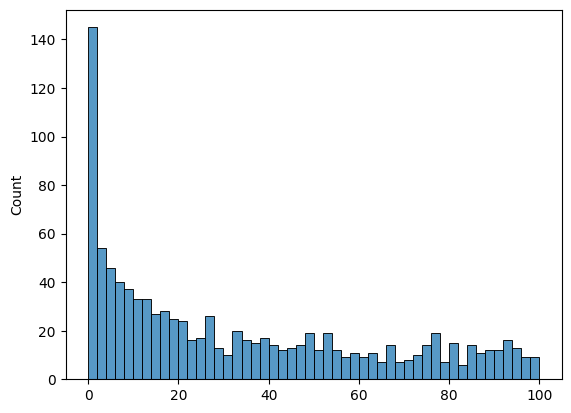

In [54]:
sns.histplot(lesson_series, bins = 50)

One disadvantage of this 50 bin picture is that the outliers are worse.  That is, the graph wobbles up and down a bit more randomly.  That's because there are fewer values in each bin, so there's more of a role for chance to take effect.  If we had many more data points and/or fewer bins, we could get rid of this wobble.

<Axes: ylabel='Count'>

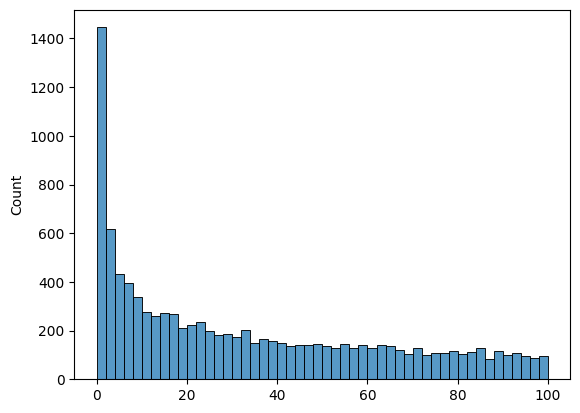

In [55]:
lesson_series_2 = np.round(np.random.random(size = 10000)**2 * 100, 2)
sns.histplot(lesson_series_2, bins = 50)

Here you can see that because the number of bins is the same as in the second graph above, but for more data, the histogram is a smoother graph.  Why does more data make for a smoother graph?  Something for you to think about.  I said it's because a larger number of data points in each bin reduces the role of chance - but why is that?

Here is a KDE (Kernel Density Estimate) plot.  It's just the same histogram, but drawn smoothly.  The KDE plot doesn't have a "number of bins."  It's always drawn the same way.  In this case, because of the smoothness of the curve, it seems that x-values less then zero and above 100 are still plotted, even though there were no such values in the dataset.  This seems like a drawback of the KDE plot, especially if the viewer is unprepared for this aspect of the plot.

<Axes: ylabel='Density'>

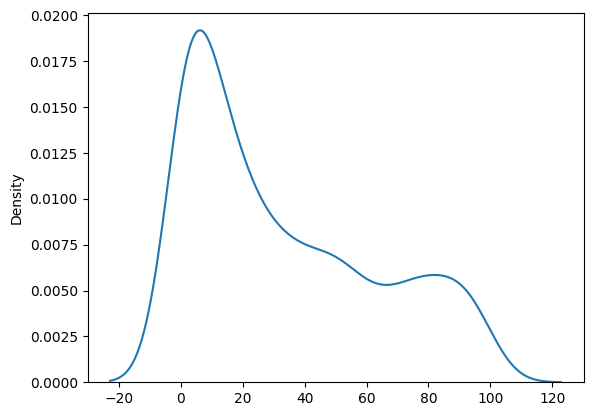

In [56]:
sns.kdeplot(lesson_series)

We could also draw a box plot.  This time, to construct the data I used a fourth power rather than squaring, with only 100 data points, so that the points are even more concentrated toward the small numbers.  It turns out that this will create a more interesting boxplot.  The top and bottom edges of the box are the 75th and 25th percentile, respectively, and the top and bottom "whiskers" show a larger range which is a multiple of 1.5 times the the box height.  (The bottom whisker cannot be see because it's pushed against the bottom of the graph.)  The filled-in box shows that half of the values are between about 0 and 30 on the y-axis.  Is that what you'd expect?  The 25th and 75th percentile of the original uniform random variable are at 0.25 and 0.75.  Taken to the fourth power and multiplied by 100 (remember, that's how we constructed our sample), that's 0.25\*\*4 * 100 = 0.4 and 0.75\*\*4 * 100 = 32.  It's plausible that those are the height of the bottom and top of the box.  We can see that a small number of samples are above the top whisker; they are shown as individual dots.

c:\Users\santo\OneDrive\Documents\GitHub\Learning\.venv\Lib\site-packages\seaborn\categorical.py:128: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.plot_data[self.orient] = ""
c:\Users\santo\OneDrive\Documents\GitHub\Learning\.venv\Lib\

<Axes: >

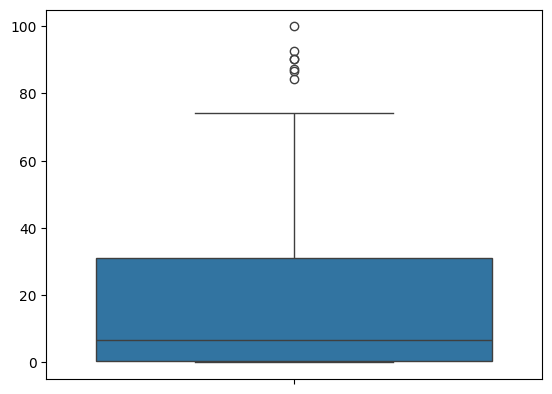

In [57]:
lesson_series_3 = np.round(np.random.random(size = 100)**4 * 100, 2)
sns.boxplot(lesson_series_3)

If we go back to the original lesson_series with the squared values, there will be two whiskers, because it isn't so strongly weighted toward small values:

c:\Users\santo\OneDrive\Documents\GitHub\Learning\.venv\Lib\site-packages\seaborn\categorical.py:128: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.plot_data[self.orient] = ""
c:\Users\santo\OneDrive\Documents\GitHub\Learning\.venv\Lib\

<Axes: >

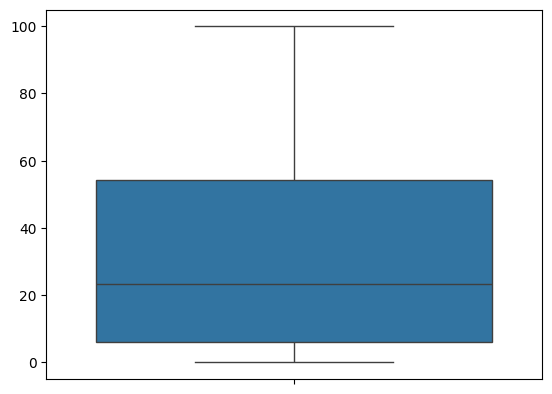

In [58]:
sns.boxplot(lesson_series)

Going back to the fourth power series, another histogram variant is the violin plot.  This simply combines a kde plot (turned on its side and forming two side of the violin) with a boxplot:

c:\Users\santo\OneDrive\Documents\GitHub\Learning\.venv\Lib\site-packages\seaborn\categorical.py:128: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.plot_data[self.orient] = ""
c:\Users\santo\OneDrive\Documents\GitHub\Learning\.venv\Lib\

<Axes: >

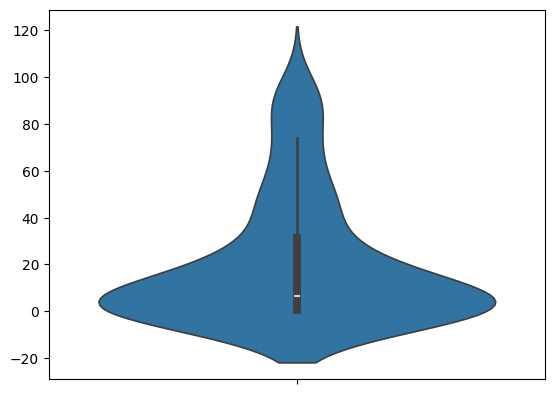

In [59]:
sns.violinplot(lesson_series_3)

Finally, a swarm plot shows the histogram (turned on its side and doubled, as with the violin plot) but showing each individual point.

c:\Users\santo\OneDrive\Documents\GitHub\Learning\.venv\Lib\site-packages\seaborn\categorical.py:128: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.plot_data[self.orient] = ""
c:\Users\santo\OneDrive\Documents\GitHub\Learning\.venv\Lib\

<Axes: >

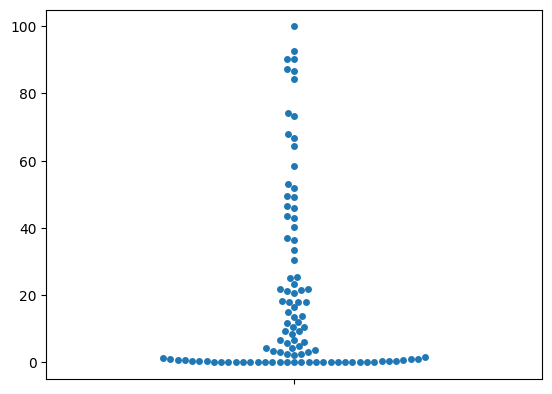

In [60]:
sns.swarmplot(lesson_series_3)

# 2. Weekly graph question

Below are a histogram and table representation of the same data.  A species of bird is being analyzed, and each individual's body length in inches has been measured.

Please write a short explanation of the pros and cons of these two representations.  Which would you choose?  How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [61]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 10000
data = np.random.normal(size = num_data) + 6
df = pd.DataFrame(data.T, columns = ["data"])

In [62]:
histnums = np.histogram(df["data"])
histcounts = histnums[0]
histmins = histnums[1][0:-1]
histmaxes = histnums[1][1:]

In [63]:
pd.DataFrame(np.array([histcounts, histmins, histmaxes]).T, columns = ["count", "minval", "maxval"])

,count,minval,maxval
0,10.0,2.259899,3.014075
1,110.0,3.014075,3.768252
2,579.0,3.768252,4.522428
3,1710.0,4.522428,5.276604
4,2833.0,5.276604,6.030780
5,2688.0,6.030780,6.784956
6,1479.0,6.784956,7.539132
7,487.0,7.539132,8.293308
8,97.0,8.293308,9.047484
9,7.0,9.047484,9.801660


<Axes: ylabel='Frequency'>

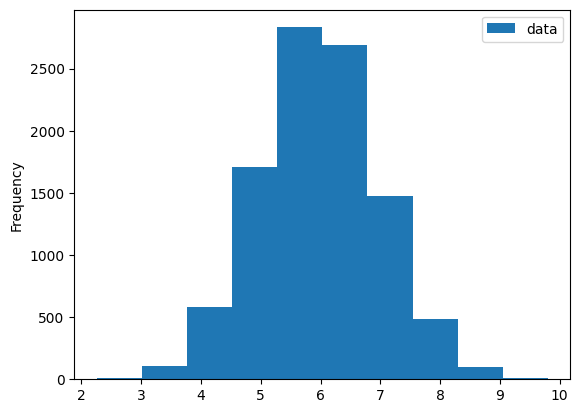

In [64]:
df.plot.hist()

For the data table specifically, there are far too many decimal places used, there is no effective labeling, and it reads visually as cluttered. I would have increased the spacing between the columns and rows, added units of meaurement to the axes, and included a title that communicates what exactly is being measured. 

For the bar chart, it is too simplistic. There is no space between the bars, making them difficult to distinguish. Additionally the horizontal axis does not begin at 0, the legend is not clarifying, none of the labels explain what the associated data is in regards to. I would have added a title concisely explaining what is being displayed, an informative legend, space between the individual bars, and effective labels with units of measurement to the axes. 

I would not have chosen either of these, I believe that a well-labeled horizontal bar chart would be very fitting for the data. 



# 3. Homework - Amusement Park Rides

Now let's imagine we have some data about how many times different visitors to an amusement park used each ride, as well as how much money they spend at the amusement park.  Each sample represents a single visit by a single visitor on a given date.

In [65]:
num_visits = 10000
np.random.seed(0)

In [66]:
df = pd.DataFrame(columns = ["VisitDate"])

In [67]:
start = datetime(2010, 1, 1)
end = datetime(2024, 1, 1)
numdays = (end - start).days
random_days = np.random.randint(0, numdays, size = num_visits)
s = start + pd.to_timedelta(random_days, unit='D')
s = s.sort_values()
df["VisitDate"] = s

In [68]:
df["IsAdult"] = np.random.choice([True, True, False], size = num_visits)

In [69]:
df["MartianRide"] = np.random.choice([0] * 8 + [1] * 3 + [2] * 3 + [3] * 1 + [10], size = num_visits) * df["IsAdult"]

C:\Users\santo\AppData\Local\Temp\ipykernel_15836\1295503938.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["MartianRide"] = np.random.choice([0] * 8 + [1] * 3 + [2] * 3 + [3] * 1 + [10], size = num_visits) * df["IsAdult"]


In [70]:
df["TeacupRide"] = np.random.choice([0] * 2 + [1] * 5 + [2] * 3 + [5] * 2, size = num_visits) * ~df["IsAdult"]

C:\Users\santo\AppData\Local\Temp\ipykernel_15836\4212009998.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["TeacupRide"] = np.random.choice([0] * 2 + [1] * 5 + [2] * 3 + [5] * 2, size = num_visits) * ~df["IsAdult"]


In [71]:
df["RiverRide"] = np.random.choice([0] * 8 + [1] * 3 + [2] * 2, size = num_visits) * df["IsAdult"] + np.random.randint(1, 5, size = num_visits) * ~df["IsAdult"]

C:\Users\santo\AppData\Local\Temp\ipykernel_15836\3184820942.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["RiverRide"] = np.random.choice([0] * 8 + [1] * 3 + [2] * 2, size = num_visits) * df["IsAdult"] + np.random.randint(1, 5, siz

In [72]:
df["MoneySpent"] = np.round(np.random.random(size = num_visits)**2 * 100, 2)

C:\Users\santo\AppData\Local\Temp\ipykernel_15836\2431782622.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["MoneySpent"] = np.round(np.random.random(size = num_visits)**2 * 100, 2)


In [73]:
df.iloc[0:5]

,VisitDate,IsAdult,MartianRide,TeacupRide,RiverRide,MoneySpent
0,2010-01-01,False,0,1,4,10.30
1,2010-01-01,True,3,0,0,38.77
2,2010-01-01,True,0,0,0,79.34
3,2010-01-01,True,0,0,1,87.84
4,2010-01-02,False,0,1,2,18.65


1. Find the mean, median, and mode for how many times visitors rode each ride.  See Week 1 for Google advice on this.

In [74]:
ride_count_Martian = df['MartianRide'].value_counts()
ride_count_Teacup = df['TeacupRide'].value_counts()
ride_count_River = df['RiverRide'].value_counts()

mean_ride_Martian = ride_count_Martian.mean()
mean_ride_Teacup = ride_count_Teacup.mean()
mean_ride_River = ride_count_River.mean()

median_ride_Martian = ride_count_Martian.median()
median_ride_Teacup = ride_count_Teacup.median()
median_ride_River = ride_count_River.median()

mode_ride_Martian = ride_count_Martian.mode()[0]
mode_ride_Teacup = ride_count_Teacup.mode()[0]
mode_ride_River = ride_count_River.mode()[0]

print(f"Mean number of rides for the Martian: {mean_ride_Martian}")
print(f"Mean number of rides for the Teacup: {mean_ride_Teacup}")
print(f"Mean number of rides for the River: {mean_ride_River}")

print(f"Median number of rides for the Martian: {median_ride_Martian}")
print(f"Median number of rides for the Teacup: {median_ride_Teacup}")
print(f"Median number of rides for the River: {median_ride_River}")

print(f"Mode of number of rides for the Martian: {mode_ride_Martian}")
print(f"Mode of number of rides for the Teacup: {mode_ride_Teacup}")
print(f"Mode of number of rides for the River: {mode_ride_River}")

Mean number of rides for the Martian: 2000.0
Mean number of rides for the Teacup: 2500.0
Mean number of rides for the River: 2000.0
Median number of rides for the Martian: 1233.0
Median number of rides for the Teacup: 1130.5
Median number of rides for the River: 1853.0
Mode of number of rides for the Martian: 396
Mode of number of rides for the Teacup: 557
Mode of number of rides for the River: 798


2. Use groupby() to find the mean, median, and mode for how many times each ride was ridden on each given day.

Suggested Google search or ChatGPT prompt: 
I first tried: "How do I use groupby to find the mean over each day in my DataFrame?" but Google didn't help me.

Then I tried: "How do I find the mean over each date in a dataframe?"  Sometimes, you have to try multiple searches.

This gives me a very helpful site, where someone is doing the same thing we are:

https://stackoverflow.com/questions/40788530/how-to-calculate-mean-of-some-rows-for-each-given-date-in-a-dataframe

In [75]:
df.groupby("VisitDate")["MartianRide"].agg(
	mean="mean",
	median="median",
	mode=lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
)

,mean,median,mode
VisitDate,,,
2010-01-01,0.75,0.0,0
2010-01-02,0.00,0.0,0
2010-01-03,0.00,0.0,0
2010-01-04,0.00,0.0,0
2010-01-05,0.50,0.5,0
...,...,...,...
2023-12-27,0.50,0.5,0
2023-12-28,6.00,6.0,2
2023-12-29,0.00,0.0,0


In [76]:
df.groupby("VisitDate")["TeacupRide"].agg(
	mean="mean",
	median="median",
	mode=lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
)

,mean,median,mode
VisitDate,,,
2010-01-01,0.25,0.0,0
2010-01-02,1.00,1.0,1
2010-01-03,1.50,0.5,0
2010-01-04,0.00,0.0,0
2010-01-05,0.00,0.0,0
...,...,...,...
2023-12-27,0.50,0.5,0
2023-12-28,0.00,0.0,0
2023-12-29,1.00,1.0,1


In [77]:
df.groupby("VisitDate")["RiverRide"].agg(
	mean="mean",
	median="median",
	mode=lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
)

,mean,median,mode
VisitDate,,,
2010-01-01,1.25,0.5,0
2010-01-02,2.00,2.0,2
2010-01-03,1.25,0.5,0
2010-01-04,1.00,1.0,1
2010-01-05,0.00,0.0,0
...,...,...,...
2023-12-27,1.00,1.0,0
2023-12-28,0.00,0.0,0
2023-12-29,3.00,3.0,3


3. Find the standard deviation and variance of the count for each ride.

Suggested Google search or ChatGPT prompt: "How do I find the standard deviation of a Series in pandas documentation?" and similar query for variance.

I included the word "documentation" because this task likely involves applying one single function for standard deviation and another for variance, so I expected that I could find a single documentation page for each that would cover my needs.  I get these:

https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.Series.var.html

https://pandas.pydata.org/docs/reference/api/pandas.Series.std.html

In [78]:
std_martian = df['MartianRide'].std()
var_martian = df['MartianRide'].var()

std_teacup = df['TeacupRide'].std()
var_teacup = df['TeacupRide'].var()

std_river = df['RiverRide'].std()
var_river = df['RiverRide'].var()

print(f"Standard Deviation of Martian Ride: {std_martian}")
print(f"Variance of Martian Ride: {var_martian}")

print(f"Standard Deviation of Teacup Ride: {std_teacup}")
print(f"Variance of Teacup Ride: {var_teacup}")

print(f"Standard Deviation of River Ride: {std_river}")
print(f"Variance of River Ride: {var_river}")       

Standard Deviation of Martian Ride: 2.0773392221359472
Variance of Martian Ride: 4.315338243824383
Standard Deviation of Teacup Ride: 1.2328509853811267
Variance of Teacup Ride: 1.519921552155215
Standard Deviation of River Ride: 1.295757465246052
Variance of River Ride: 1.6789874087408738


4. Find the 90th percentile count for each ride.  That is, if the customers are ordered by their number of rides, and there are 100 customers, how many rides does the 90th person take?  There is a function in pandas that easily does this calculation.

Suggested Google search or ChatGPT prompt: "How do I find a percentile value for a Series in pandas documentation?"

This time, I will let you find the page!  Hint: it's not actually called the "percentile" function.

In [79]:
percentile_90_martian = df['MartianRide'].quantile(0.9)
percentile_90_teacup = df['TeacupRide'].quantile(0.9)
percentile_90_river = df['RiverRide'].quantile(0.9)

print(f"90th percentile for Martian Ride: {percentile_90_martian}")
print(f"90th percentile for Teacup Ride: {percentile_90_teacup}")
print(f"90th percentile for River Ride: {percentile_90_river}")

90th percentile for Martian Ride: 2.0
90th percentile for Teacup Ride: 2.0
90th percentile for River Ride: 3.0


5. Plot a histogram of the ride count, using each day as data element as you did in #2.  Use both the total ride count for each day as well as, separately, the mean ride count for each day.

Suggested Google search or ChatGPT prompt: "How do I plot a histogram for a Series in pandas?"

I found this: https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.hist.html

Note: the "by" keyword will not help you plot a count for each day; if you try to use it for this, it will try to draw a separate histogram for each day.

You've already learned how to find the mean ride count for each day.  Can you use a similar idea to find the total ride count for each day?

<Axes: title={'center': 'Histogram of Mean Daily Rides on River Ride'}, ylabel='Frequency'>

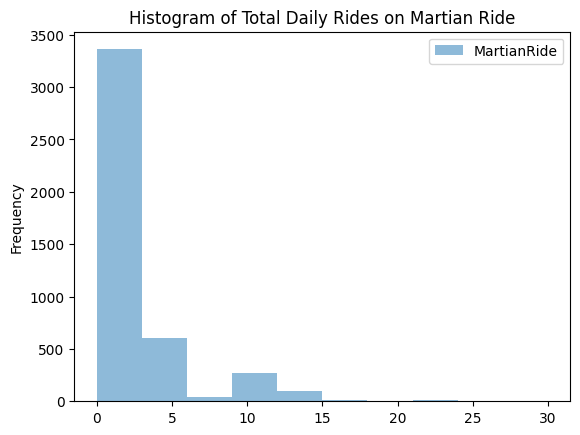

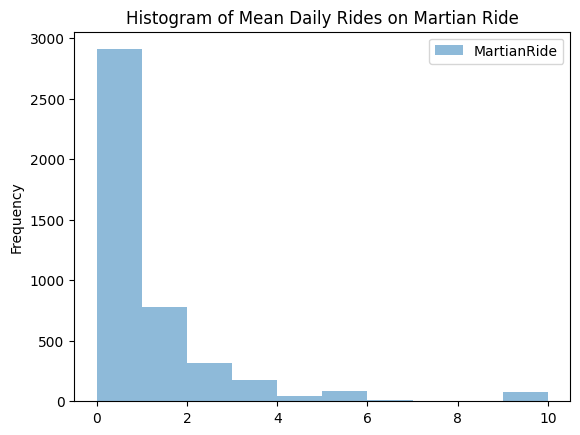

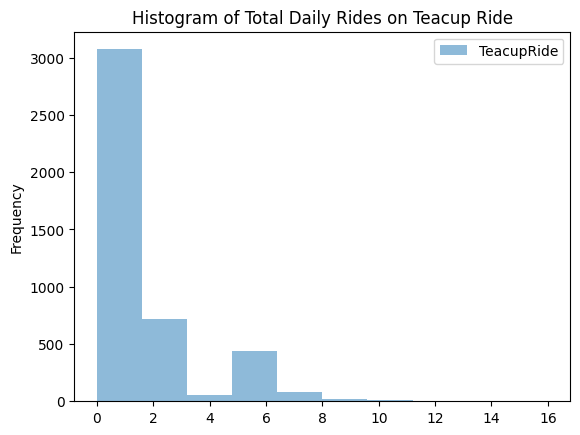

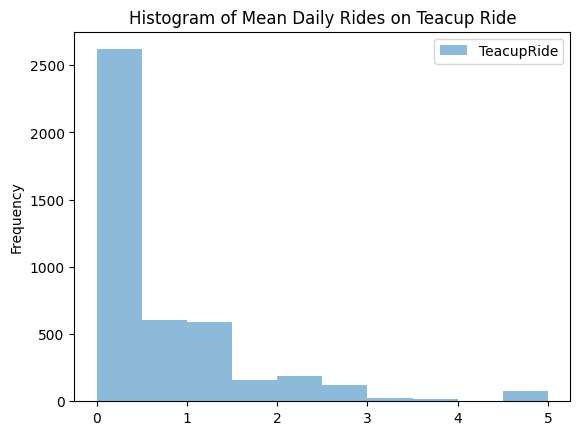

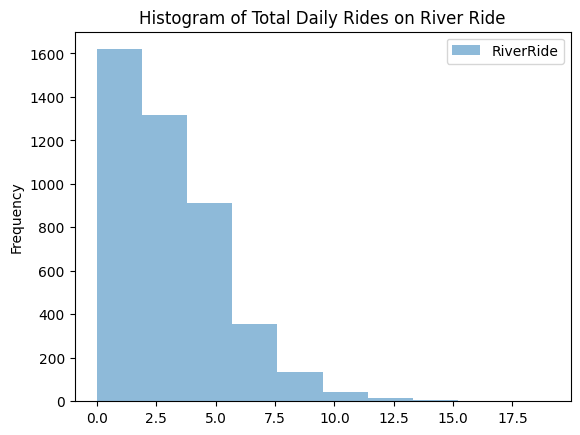

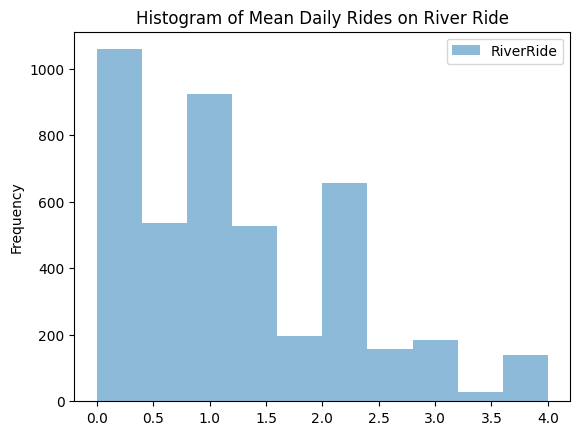

In [82]:
daily_total_rides_Martian = df.groupby('VisitDate')[['MartianRide']].sum()
daily_mean_rides_Martian = df.groupby('VisitDate')[['MartianRide']].mean()

daily_total_rides_Martian.plot.hist(alpha=0.5, title='Histogram of Total Daily Rides on Martian Ride')
daily_mean_rides_Martian.plot.hist(alpha=0.5, title='Histogram of Mean Daily Rides on Martian Ride')

daily_total_rides_Teacup = df.groupby('VisitDate')[['TeacupRide']].sum()
daily_mean_rides_Teacup = df.groupby('VisitDate')[['TeacupRide']].mean()

daily_total_rides_Teacup.plot.hist(alpha=0.5, title='Histogram of Total Daily Rides on Teacup Ride')
daily_mean_rides_Teacup.plot.hist(alpha=0.5, title='Histogram of Mean Daily Rides on Teacup Ride')

daily_total_rides_River = df.groupby('VisitDate')[['RiverRide']].sum()
daily_mean_rides_River = df.groupby('VisitDate')[['RiverRide']].mean()

daily_total_rides_River.plot.hist(alpha=0.5, title='Histogram of Total Daily Rides on River Ride')
daily_mean_rides_River.plot.hist(alpha=0.5, title='Histogram of Mean Daily Rides on River Ride')


6. Make a bar chart showing the total number of Adult and Child participants.

Try to formulate your own Google search or ChatGPT prompt.

Here's one page I found:

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

which shows some interesting examples for you to use.  I recommend clicking on the first, basic example to see how to use the function.

You can also look up the pandas documentation, which might lead to an entirely different method.

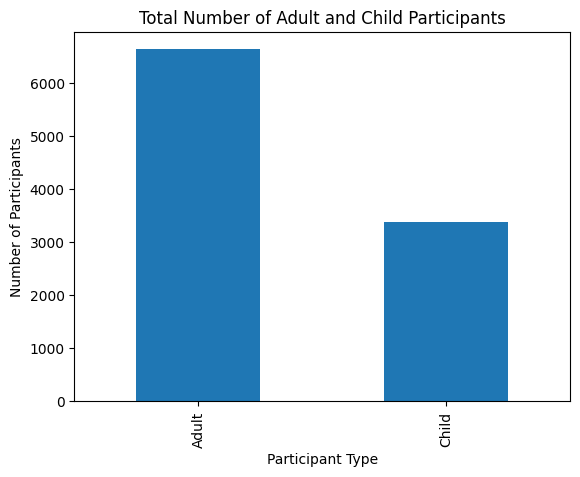

In [83]:
import matplotlib.pyplot as plt

participant_counts = df['IsAdult'].value_counts()
participant_counts.index = ['Adult', 'Child']
participant_counts.plot.bar(title='Total Number of Adult and Child Participants')
plt.xlabel("Participant Type")
plt.ylabel("Number of Participants")
plt.show()

7. Make a stacked bar chart showing how many Adult and Child visits took the River Ride, with the x-axis showing the number of rides and with two stacked bars (adult, child).  That is, there could be a column for the number of Adults (and Children) who took 0 rides, 1 ride, 2 rides, and so on.

Try to formulate your own Google search or ChatGPT prompt.

For me, the pandas documentation was easier than the matplotlib documentation.

* If you use the pandas method, you might have to one-hot encode the IsAdult column.  You might want names for the new columns other than True and False.  Use df.join or pd.concat to attach the pd.get_dummies table you've created, and then groupby the RiverRide value.

* You will need to end up with a small table with two columns (IsAdult True and False) and an index (RiverRide) as well as a small number of rows (the values of RiverRide)

* That said, if you can come up with another approach, it's fine.

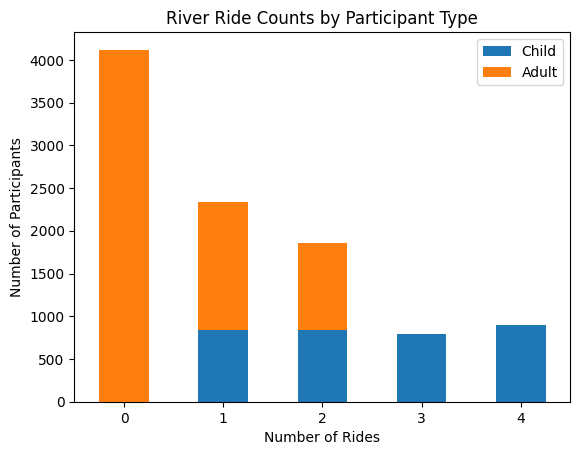

In [85]:
# Create a cross-tabulation of RiverRide counts vs. IsAdult
ride_counts = pd.crosstab(df['RiverRide'], df['IsAdult'])

# Rename columns for clarity
ride_counts.columns = ['Child', 'Adult']

# Plot the stacked bar chart
ride_counts.plot.bar(stacked=True, title='River Ride Counts by Participant Type', rot=0)
plt.xlabel("Number of Rides")
plt.ylabel("Number of Participants")
plt.show()

8. Other tasks

Use seaborn (import seaborn as sns) to create a kernel density estimation (kde) plot.  (You can choose any aspect of the amusement park dataset to plot.)  Here is a tutorial you can read about seaborn:

https://seaborn.pydata.org/tutorial/introduction.html

Seaborn often makes nicer looking graphs than pandas or matplotlib.

Now use seaborn to make a swarm plot, a violin plot, and a box plot.

Which plots are the best for showing this data?

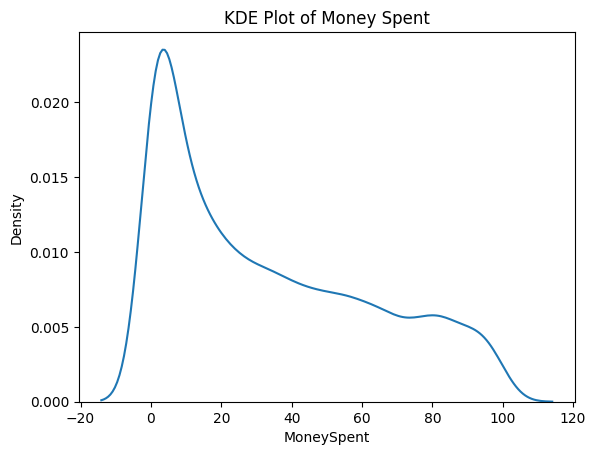

In [86]:

sns.kdeplot(data=df, x='MoneySpent')
plt.title('KDE Plot of Money Spent')
plt.show()


c:\Users\santo\OneDrive\Documents\GitHub\Learning\.venv\Lib\site-packages\seaborn\categorical.py:128: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.plot_data[self.orient] = ""
c:\Users\santo\OneDrive\Documents\GitHub\Learning\.venv\Lib\

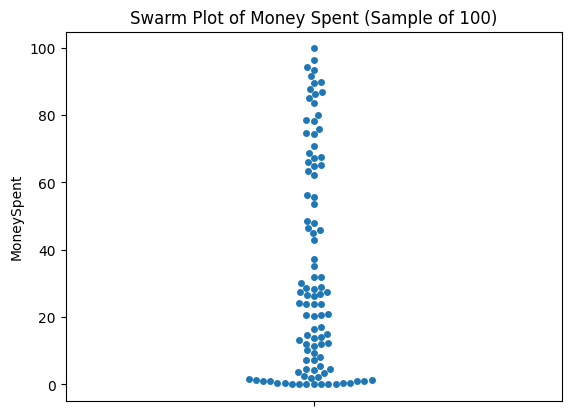

c:\Users\santo\OneDrive\Documents\GitHub\Learning\.venv\Lib\site-packages\seaborn\categorical.py:128: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.plot_data[self.orient] = ""
c:\Users\santo\OneDrive\Documents\GitHub\Learning\.venv\Lib\

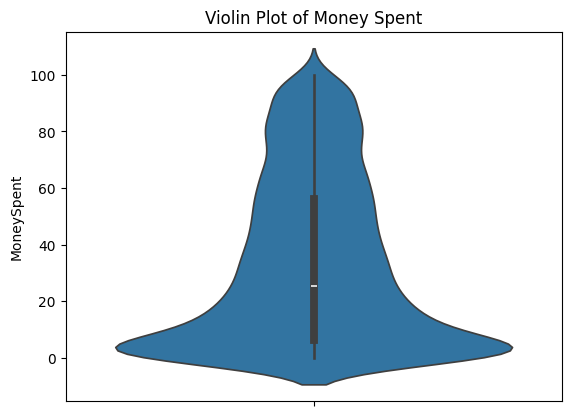

c:\Users\santo\OneDrive\Documents\GitHub\Learning\.venv\Lib\site-packages\seaborn\categorical.py:128: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.plot_data[self.orient] = ""
c:\Users\santo\OneDrive\Documents\GitHub\Learning\.venv\Lib\

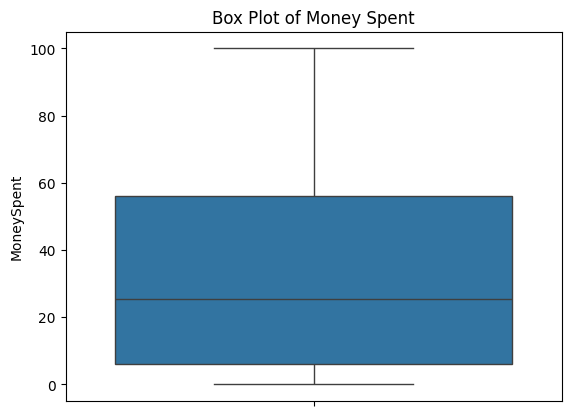

In [92]:

df_sample = df.sample(100)
sns.swarmplot(data=df_sample, y='MoneySpent')
plt.title('Swarm Plot of Money Spent (Sample of 100)')
plt.show()

sns.violinplot(data=df, y='MoneySpent')
plt.title('Violin Plot of Money Spent')
plt.show()

sns.boxplot(data=df, y='MoneySpent')
plt.title('Box Plot of Money Spent')
plt.show()

Out of the four plots, in my opinion, the violin plot is the best because it offers the summary statistics of the box plot while also providing a clearer sense of the distribution's shape like the KDE plot. The swarm plot is definitely the least suitable of the four.  

# 4. Storytelling With Data graph

Try to make a scatterplot using amusement park dataset that is similar to the one on page 45, where the two axes are the Teacup Ride count and the River Ride count.  If you want to see individual dots and not a dense swarm of dots, you'll have to cut the dataset down to a small number of points (say, 100 points or so).  You can remove the other points, for instance, and focus on the first 100 points.

Here are some things you could do (you don't have to do all of them):

* Draw a dashed line that roughly separates the adult from child points.

* Draw the points in the adult vs. child region of the graph in different colors.

* Choose the right size and number of dots to make the graph look good.

* Write a word that appears on the dashed line (like AVG in the plot on page 45).

If there are any other graphs in the Storytelling With Data chapter that look interesting, and you want more practice, you can try to reproduce them too.

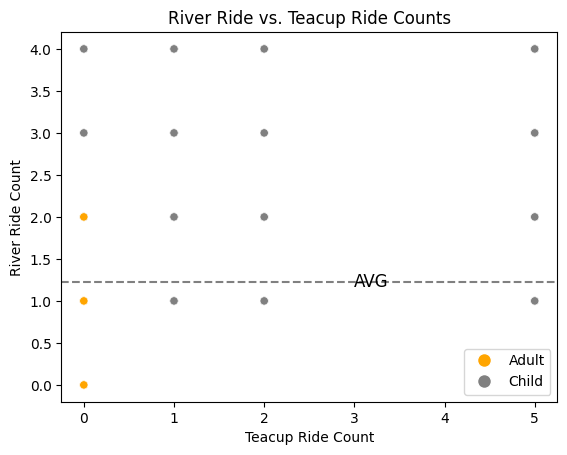

In [107]:
from matplotlib.lines import Line2D

df_sample = df.sample(250, random_state=1)

colors = {True: 'orange', False: 'grey'}
sns.scatterplot(data=df_sample, x='TeacupRide', y='RiverRide', hue='IsAdult', palette=colors, legend=False)

avg_river_ride = df_sample['RiverRide'].mean()

plt.axhline(y=avg_river_ride, color='grey', linestyle='--')

plt.text(df_sample['TeacupRide'].max() * 0.6, avg_river_ride, 'AVG', verticalalignment='center', size='large', color='black')

plt.title('River Ride vs. Teacup Ride Counts')
plt.xlabel('Teacup Ride Count')
plt.ylabel('River Ride Count')

# Custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Adult',
                          markerfacecolor='orange', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Child',
                          markerfacecolor='grey', markersize=10)]
plt.legend(handles=legend_elements)

plt.show()